In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from read_file import read_input

In [9]:
import re

In [7]:
file = read_input('input_10.txt', '\n')[:-1]

In [16]:
file[1]

'position=< 22070, -54534> velocity=<-2,  5>'

In [20]:
pat = r'[ -]\d+'
re.findall(pat, file[1])

[' 22070', '-54534', '-2', ' 5']

In [25]:
pos_and_vels = (re.findall(pat, line) for line in file)
coords = [{'point': (int(x), int(y)), 'velocity': (int(dx), int(dy))} for x, y, dx, dy in pos_and_vels]

In [110]:
positions = np.array([dicty['point'] for dicty in coords])
velocities = np.array([dicty['velocity'] for dicty in coords])

In [78]:
positions.max(axis=0)
positions.min(axis=0)

array([54932, 54927])

array([-54589, -54542])

In [75]:
np.array([[1, 2], [3, 4]]) + np.array([[1, 2], [3, 4]])

array([[2, 4],
       [6, 8]])

In [38]:
max_x, min_x = max(coords, key=lambda x: x['point'][0])['point'][0], min(coords, key=lambda x: x['point'][0])['point'][0]

In [39]:
max_x
min_x

54932

-54589

In [40]:
max_y, min_y = max(coords, key=lambda x: x['point'][1])['point'][1], min(coords, key=lambda x: x['point'][1])['point'][1]

In [41]:
min_y, max_y

(-54542, 54927)

In [45]:
width = max_x + -min_x
height = max_y + -min_y

In [46]:
height, width

(109469, 109521)

In [47]:
np.zeros((height, width))

MemoryError: 

In [49]:
np.empty((height, width))

MemoryError: 

In [61]:
copy_coords = [{key: list(value) for key, value in dicty.items()} for dicty in coords]

In [54]:
for _ in range(100):
    for coord in copy_coords:
        coord['point'][0] += coord['velocity'][0]
        coord['point'][1] += coord['velocity'][1]

In [56]:
coords[:10]

[{'point': (-54530, -54537), 'velocity': (5, 5)},
 {'point': (22070, -54534), 'velocity': (-2, 5)},
 {'point': (-54581, -32648), 'velocity': (5, 3)},
 {'point': (22060, -54537), 'velocity': (-2, 5)},
 {'point': (-10805, -54535), 'velocity': (1, 5)},
 {'point': (32980, -32646), 'velocity': (-3, 3)},
 {'point': (-43635, 54921), 'velocity': (4, -5)},
 {'point': (-32673, 33034), 'velocity': (3, -3)},
 {'point': (43954, -43596), 'velocity': (-4, 4)},
 {'point': (43954, -43587), 'velocity': (-4, 4)}]

In [55]:
copy_coords[:10]

[{'point': [-54030, -54037], 'velocity': [5, 5]},
 {'point': [21870, -54034], 'velocity': [-2, 5]},
 {'point': [-54081, -32348], 'velocity': [5, 3]},
 {'point': [21860, -54037], 'velocity': [-2, 5]},
 {'point': [-10705, -54035], 'velocity': [1, 5]},
 {'point': [32680, -32346], 'velocity': [-3, 3]},
 {'point': [-43235, 54421], 'velocity': [4, -5]},
 {'point': [-32373, 32734], 'velocity': [3, -3]},
 {'point': [43554, -43196], 'velocity': [-4, 4]},
 {'point': [43554, -43187], 'velocity': [-4, 4]}]

In [69]:
max_x, min_x = max(copy_coords, key=lambda x: x['point'][0])['point'][0], min(copy_coords, key=lambda x: x['point'][0])['point'][0]
max_y, min_y = max(copy_coords, key=lambda x: x['point'][1])['point'][1], min(copy_coords, key=lambda x: x['point'][1])['point'][1]

In [70]:
max_x, min_x
max_y, min_y

(4927, -4584)

(4922, -4537)

In [67]:
max_x, min_x = max(coords, key=lambda x: x['point'][0])['point'][0], min(coords, key=lambda x: x['point'][0])['point'][0]
max_y, min_y = max(coords, key=lambda x: x['point'][1])['point'][1], min(coords, key=lambda x: x['point'][1])['point'][1]

In [68]:
max_x, min_x
max_y, min_y

(54932, -54589)

(54927, -54542)

In [62]:
for coord in copy_coords:
    coord['point'][0] += (coord['velocity'][0] * 10000)
    coord['point'][1] += (coord['velocity'][1] * 10000)

In [65]:
for coord in copy_coords:
    coord['point'][0] += (coord['velocity'][0])
    coord['point'][1] += (coord['velocity'][1])

In [66]:
old_x = (4932, -4589)
old_y = (4927, -4542)

In [71]:
np.zeros((old_y[0] - old_y[1], old_x[0] - old_x[1]))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
def show_img(positions, velocities):
    """
    """
    corrected_positions = positions - positions.min(axis=0)
    corrected_positions += (velocities * 10900)
    corrected_positions -= corrected_positions.min(axis=0)
    while True:
        corrected_positions += velocities
        corrected_positions -= corrected_positions.min(axis=0)
        try:
            x, y = corrected_positions.max(axis=0)
            zeros = np.zeros((y+1, x+1))
        except MemoryError:
            continue
        for x, y in corrected_positions:
            zeros[y, x] = 1
        yield plt.imshow(zeros)

In [128]:
def determine_min_iterations(positions, velocities):
    """
    """
    new_positions = positions.copy()
    iters = []
    for _ in range(20001):
        min_x, min_y = new_positions.min(axis=0)
        max_x, max_y = new_positions.max(axis=0)
        range_x, range_y = max_x - min_x, max_y - min_y
        area = range_x * range_y
        iters.append(area)
        new_positions += velocities
    return iters

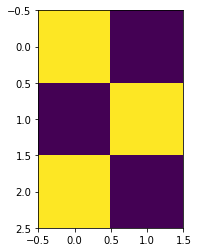

In [83]:
plt.imshow(np.array([[1, 0], [0, 1], [1, 0]]))

In [84]:
arr = np.array([[1, 0], [2, 3]])

In [86]:
arr + np.array([[2, 2], [3, 3]])

array([[3, 2],
       [5, 6]])

In [89]:
(positions - positions.min(axis=0)).min(axis=0)

array([0, 0])

In [90]:
arr

array([[1, 0],
       [2, 3]])

In [92]:
for i, a in arr:
    print(i)
    print(a)

1
0
2
3


In [136]:
a = show_img(positions, velocities)

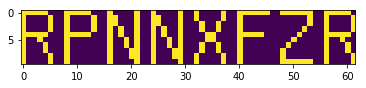

In [184]:
next(a); # cell with answer

In [141]:
iters = determine_min_iterations(positions, velocities)

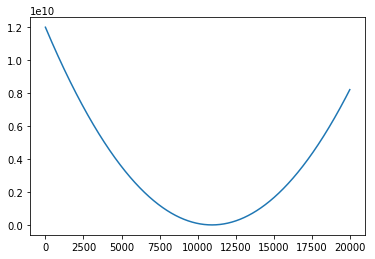

In [131]:
plt.plot(np.arange(len(iters)), iters)

In [134]:
iters.index(min(iters))

10946